<a href="https://colab.research.google.com/github/AndreaValenciaBorja/smartQuestion/blob/main/AnalisisUnivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS UNIVARIADO**

El data set cuenta con la informacion de los paciente que ingresaron a la Unidad de cuidado intensivo adultos en el primer semestre del 2024

In [38]:
# Importar librerías
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Se carga el dataset
df = pd.read_excel('pertinencia_uci.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [24]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
df.head(6)

,Sigla UnOrg.enfermería,Fecha de admisión,Episodio,Edad,Sexo,Cama,Habit.,Aseguradora,Categ.tratamiento,Fecha Ingreso Uci,...,GLOSA PROBABLE EVITADA,NÚMERO DE RX SIN COMENTAR,COMENTARIO AUDITORIA,CAMBIO CATEGORIA DESDE COORDINACIÓN,CAMBIO FACTURACIÓN,GLOSA EFECTIVA NOTAS CRÉDITO,FACTURA NOTAS CRÉDITO,MES REVISIÓN,GLOSA EFECTIVA PREGLOSA,FECHA GLOSADA
0,T4P7 UCI,2024-03-14,11781030,68,F,CH-740T4,HA-740T4,ASMET SALUD,UCIADU,2024-03-14 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
1,T4P7 UCI,2024-03-02,11736934,60,F,CH-743T4,HA-743T4,NUEVA EPS,UCIADU,2024-03-02 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2,T4P7 UCI,2024-02-19,11689275,77,M,CH-744T4,HA-744T4,NUEVA EPS,UCIADU,2024-02-21 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,T3P2 UCI AdA,2024-03-09,11764746,74,F,CU-203T3,SH-T3P2A,NUEVA EPS,UCIADU,2024-03-09 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
4,T3P2 UCI AdA,2024-03-03,11735955,62,F,CU-204T3,SH-T3P2A,SALUD TOTAL,UCIADU,2024-03-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
5,T3P2 UCI AdA,2024-03-13,11668613,75,M,CU-205T3,SH-T3P2A,NUEVA EPS,AISUCI,2024-03-13 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN


In [26]:
# Comprobar el tipo de datos
df.dtypes

,0
Sigla UnOrg.enfermería,object
Fecha de admisión,datetime64[ns]
Episodio,int64
Edad,int64
Sexo,object
Cama,object
Habit.,object
Aseguradora,object
Categ.tratamiento,object
Fecha Ingreso Uci,object


In [50]:
# Obtener el resumen estadístico de la columna 'Edad' de los pacientes que ingresaron a UCI los ultimos 6 meses
resumen = df['Edad'].describe()

# Mostrar el resumen
print(resumen)

count    1916.000000
mean       56.812109
std        18.760443
min        18.000000
25%        43.000000
50%        59.000000
75%        71.000000
max        97.000000
Name: Edad, dtype: float64


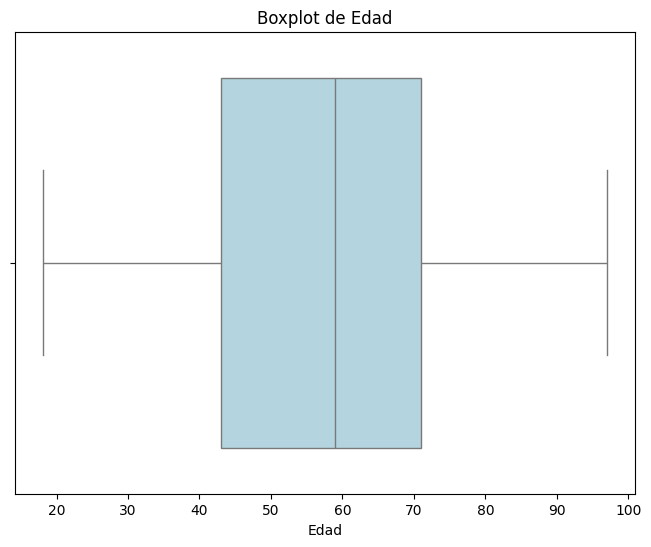

In [57]:
mean = 56.812109
std = 18.760443
min_age = 18.000000
q25 = 43.000000
median = 59.000000
q75 = 71.000000
max_age = 97.000000

np.random.seed(0)
data = np.concatenate([
    np.random.uniform(min_age, q25, size=n//4),
    np.random.uniform(q25, median, size=n//4),
    np.random.uniform(median, q75, size=n//4),
    np.random.uniform(q75, max_age, size=n//4)
])

df = pd.DataFrame({'Edad': data})

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Edad'], color='lightblue')
plt.title('Boxplot de Edad')
plt.xlabel('Edad')

plt.show()

**ANALISIS UNIVARIADO**

Se realizo el analisis univariado de los pacientes que ingresaron a la Unidad de Cuidados intermedios de adultos en los ultimos 6 meses

**Tendencia central:** La edad promedio se sitúa en 56.81 años, lo que indica que el grupo de individuos es, en general, de edad madura.

**Dispersión:** La desviación estándar de 18.76 años sugiere que existe una variabilidad considerable en las edades, con algunos individuos mucho más jóvenes o mayores que el promedio.

**Distribución:** Basándonos en los percentiles, podemos inferir que la distribución de las edades podría ser aproximadamente simétrica, con una ligera tendencia a la derecha (positivo sesgo), ya que la diferencia entre el tercer cuartil (75%) y la mediana es ligeramente mayor que la diferencia entre la mediana y el primer cuartil (25%).